In [1]:
import numpy as np
#import nltk
import unicodedata
from collections import Counter
import matplotlib.pylab as plt
import pandas as pd

In [2]:
#Abrir y leer texto
file = open('Borges.txt', 'r')
texto = file.read()

In [3]:
#Cambio a minúscula
texto = texto.lower()

In [4]:
#Diccionario fonemización simple
ori = ['qu','v','x','z','ch','h','ce','ci','c','j','ge','gi','gue','gui','y ','y,','y.','ll',' r','rr','sr','nr','lr']
new = ['k','b','ks','s','v','','se','si','k','x','xe','xi','ge','gi','i ','i,','i.','y',' q','q','sq','nq','lq']

In [5]:
#Reemplazo fonemización simple
texto_ps = texto
for i in range(0,len(ori)):
    texto_ps = texto_ps.replace(ori[i],new[i])

In [6]:
#Puntuación a quitar
import string
punctuation = string.punctuation+'¡'+'"'+'¿'+'—'+'“'+'-'+'”'+'º'+'¿'+'—'+'“'+'-'+'”'+'¡'+'1'+'2'+'5'+'6'+'7'+'8'+'0'+'º'+'9'+'4'+'3'+'«'+'»'+'.'+'–'+'’'+'...'+'\n'

In [7]:
#Quito puntuación
for p in punctuation:
    texto = texto.replace(p,'')
    texto_ps = texto_ps.replace(p,'')

In [8]:
#"Quito espacios en blancos"
texto = texto.replace(' ','')
texto_ps = texto_ps.replace(' ','')

In [9]:
#Defino diacriticas y otras letras especiales ü->% y ñ->#
diacriticas = ['í','ú','á','é','ó','ü','ñ']
normal = ['i','u','a','e','o','%','#']

In [10]:
#Quito todas las diacriticas para fig 1 a 4
texto_i = texto_ps
for diac in range(0,len(diacriticas)):
    texto = texto.replace(diacriticas[diac],normal[diac])
    texto_ps = texto_ps.replace(diacriticas[diac],normal[diac])

In [11]:
#Texto para figura 3
phone_w1 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','iu':'iw','ui':'wi','uo':'wo','ou':'ow'}
texto_w = texto_ps
for key in phone_w1.keys():
    texto_w = texto_w.replace(key,phone_w1[key])

In [12]:
#Texto para figura 4
phone_j = {'ia':'ja','ai':'aj','ei':'ej','ie':'je','io':'jo','oi':'oj','iu':'ju','ui':'uj'}
phone_w2 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj'}
texto_i1 = texto_ps
for key in phone_j.keys():
    texto_i1 = texto_i1.replace(key,phone_j[key])
for key in phone_w2.keys():
    texto_i1 = texto_i1.replace(key,phone_w2[key])

In [13]:
#Texto para figura 5
phone_w3 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj','ui':'wi','iu':'iw'}
for key in phone_j.keys():
    texto_i = texto_i.replace(key,phone_j[key])
for diac in range(0,len(diacriticas)):
    texto_i = texto_i.replace(diacriticas[diac],normal[diac])
for key in phone_w3.keys():
    texto_i = texto_i.replace(key,phone_w3[key])

In [14]:
#Función para Gráfica y Datos fig.1  Letras como fonemas
def Grafica_Datos_1(text):
    Contador = Counter(text)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

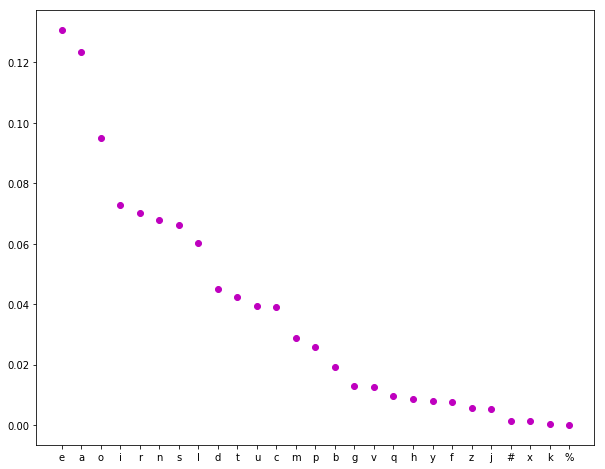

In [15]:
f1, data1 = Grafica_Datos_1(texto)

In [16]:
data1

,Frecuencia,Fraccional
e,2912,0.130835
a,2747,0.123422
o,2114,0.094981
i,1619,0.072741
r,1563,0.070225
n,1513,0.067979
s,1473,0.066181
l,1341,0.060251
d,1004,0.045109
t,943,0.042369


In [17]:
#Función para Gráfica y Datos fig.2 Fonemizacion simple
def Grafica_Datos_2(text_ps):
    Contador = Counter(text_ps)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

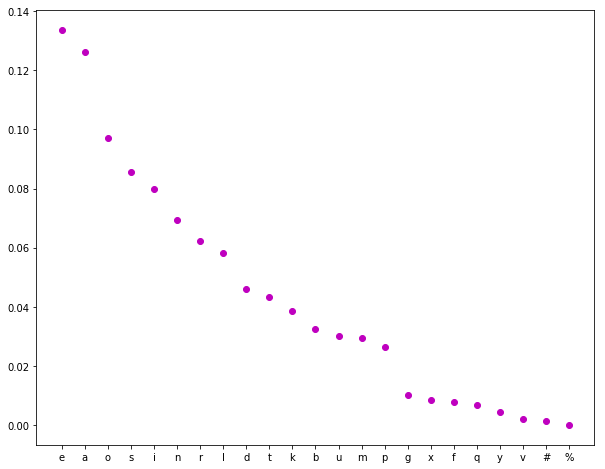

In [18]:
f2, data2 = Grafica_Datos_2(texto_ps)

In [19]:
#Función para Gráfica y Datos fig.3 Fonemas /w/ y /u/
def Grafica_Datos_3(text_w):
    Contador = Counter(text_w)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

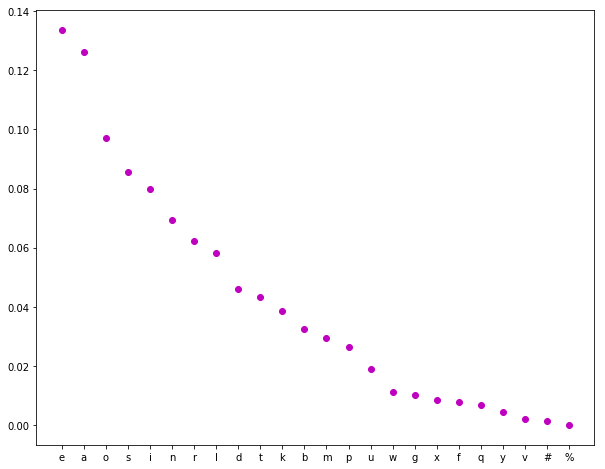

In [20]:
f3, data3 = Grafica_Datos_3(texto_w)

In [21]:
data3

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
i,1738,0.079791
n,1513,0.069461
r,1359,0.062391
l,1267,0.058167
d,1004,0.046093
t,943,0.043293


In [22]:
#Función para Gráfica y Datos fig.4 Fonemas /w/ y /u/ & /i/ y /j/
def Grafica_Datos_4(text_i1):
    Contador = Counter(text_i1)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

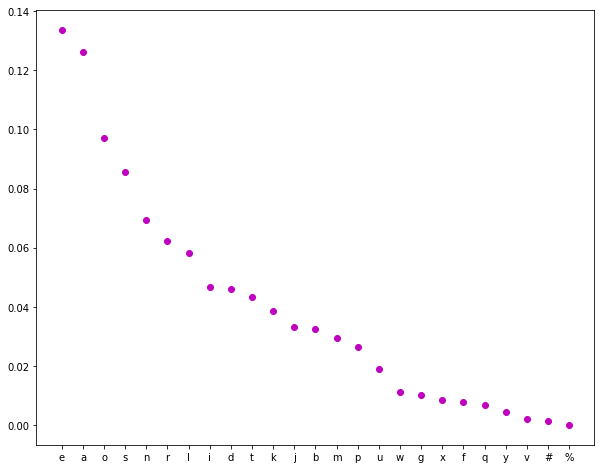

In [23]:
f4, data4 = Grafica_Datos_4(texto_i1)

In [24]:
data4

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
n,1513,0.069461
r,1359,0.062391
l,1267,0.058167
i,1014,0.046552
d,1004,0.046093
t,943,0.043293


In [25]:
#Función para Gráfica y Datos fig.5 Fonemas /w/ y /u/ & /i/ y /j/ tomando encuenta diacríticas
def Grafica_Datos_5(text_i):
    Contador = Counter(text_i)
    Data = pd.DataFrame.from_dict(Contador, orient='index', columns = ['Frecuencia'])
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    fig = plt.figure(figsize = (10,8))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

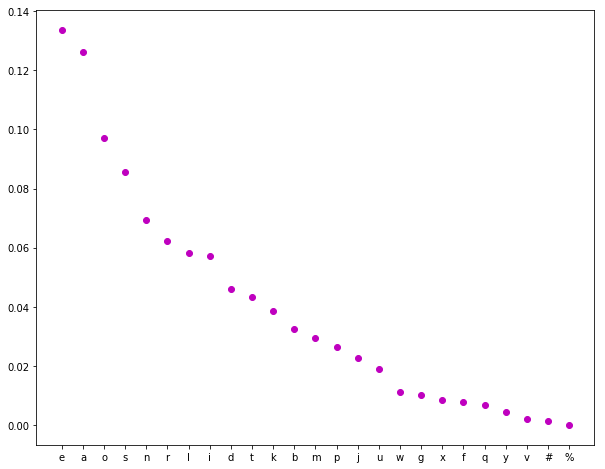

In [26]:
f5, data5 = Grafica_Datos_5(texto_i)

In [27]:
data5

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
n,1513,0.069461
r,1359,0.062391
l,1267,0.058167
i,1246,0.057203
d,1004,0.046093
t,943,0.043293
